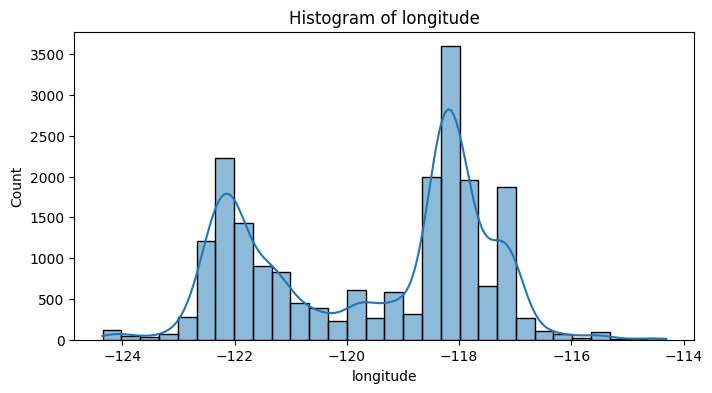

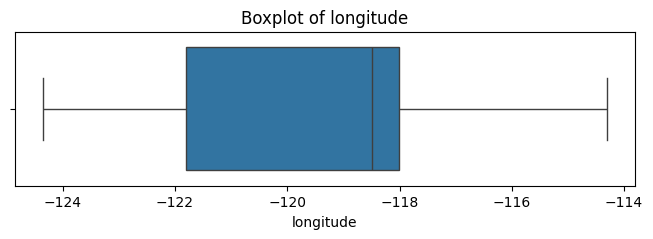

longitude has 0 outliers



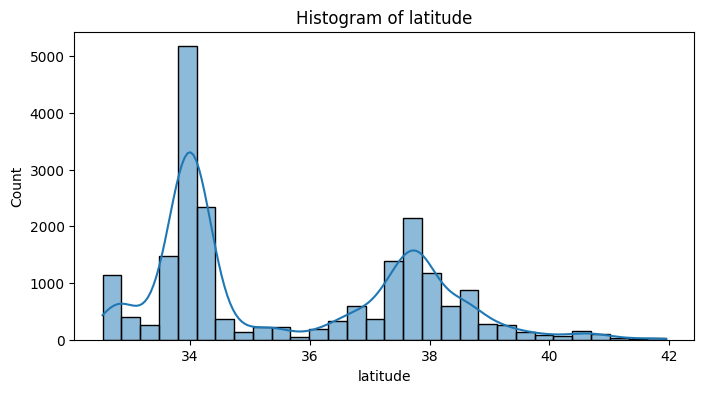

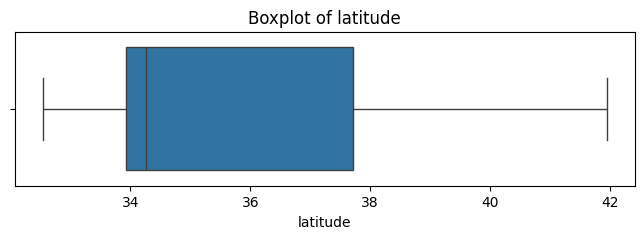

latitude has 0 outliers



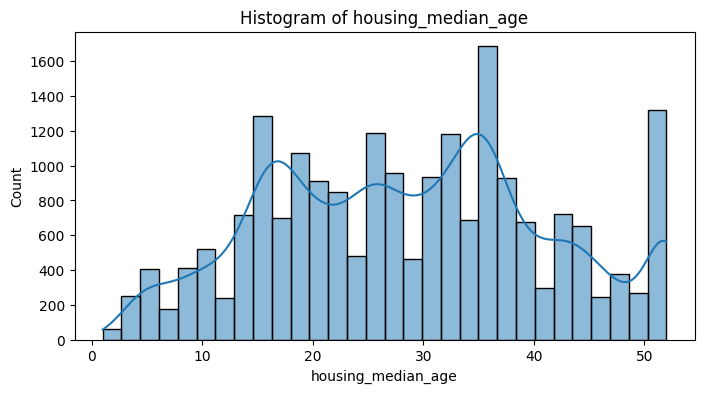

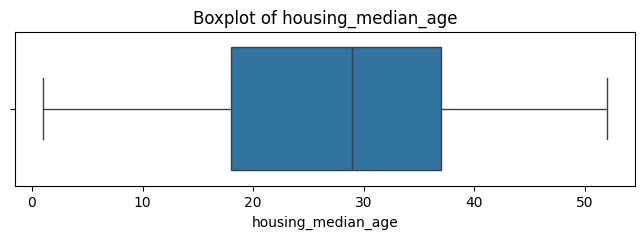

housing_median_age has 0 outliers



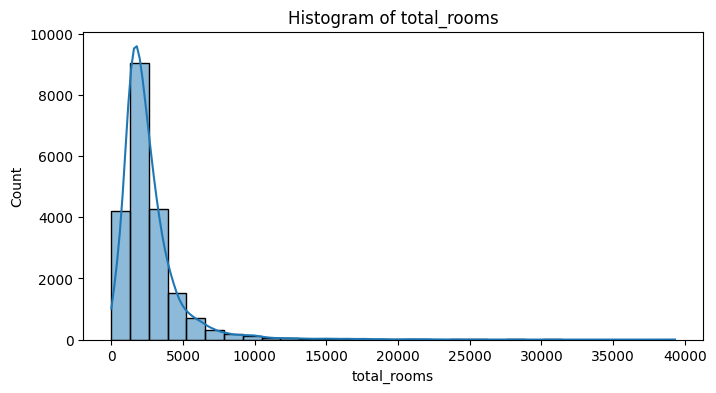

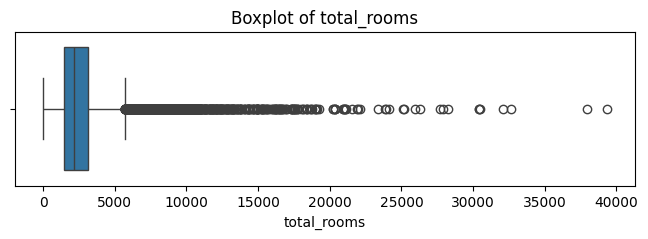

total_rooms has 1287 outliers



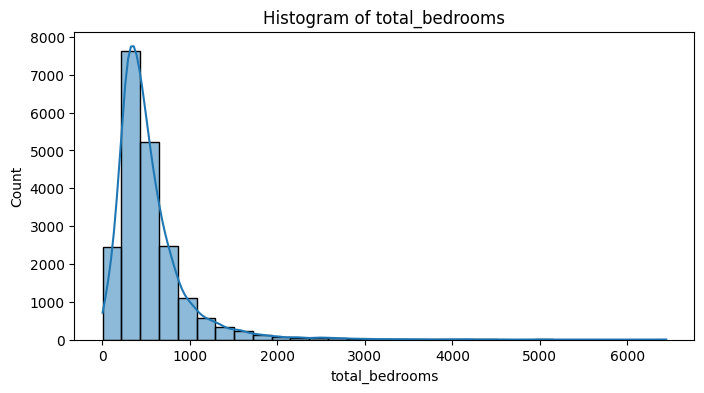

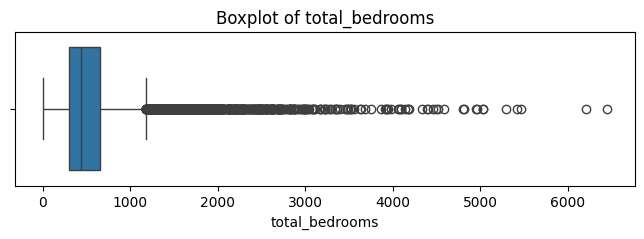

total_bedrooms has 1271 outliers



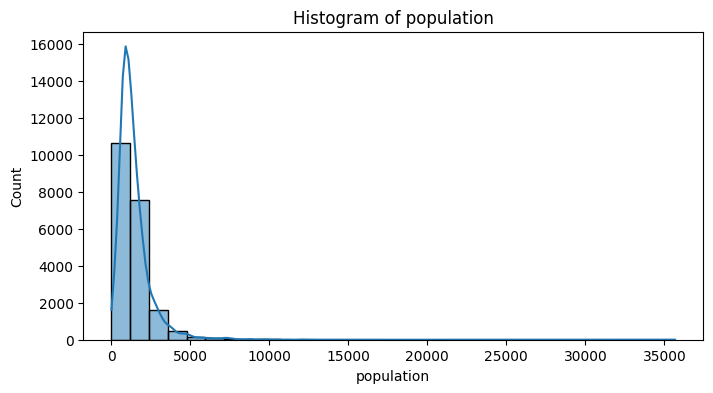

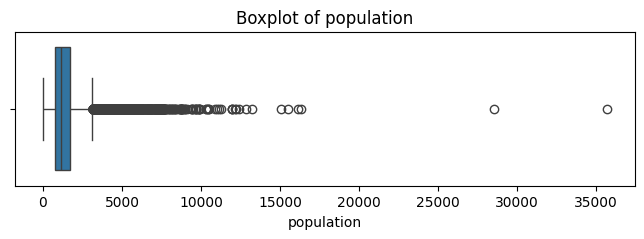

population has 1196 outliers



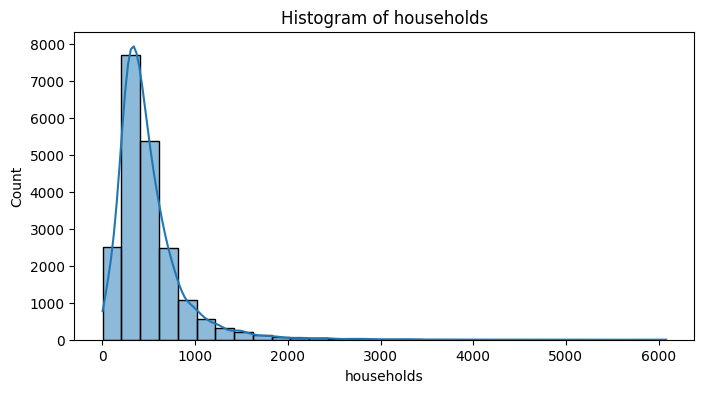

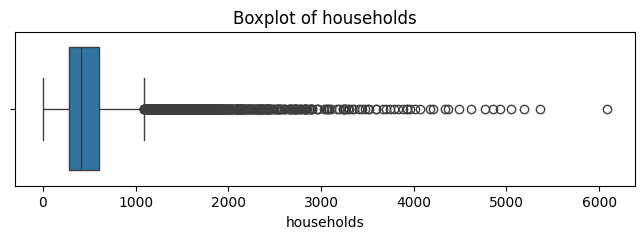

households has 1220 outliers



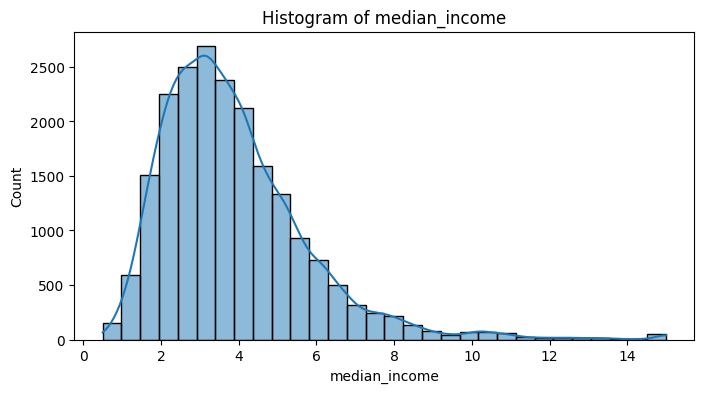

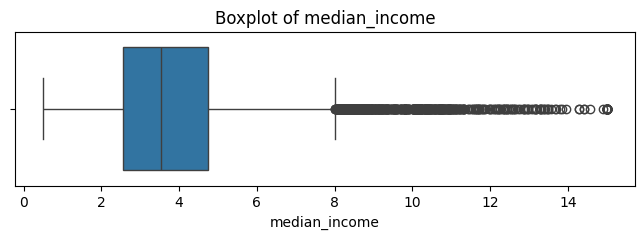

median_income has 681 outliers



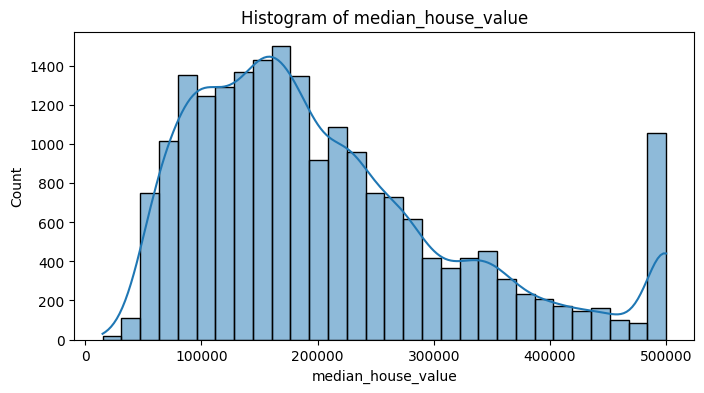

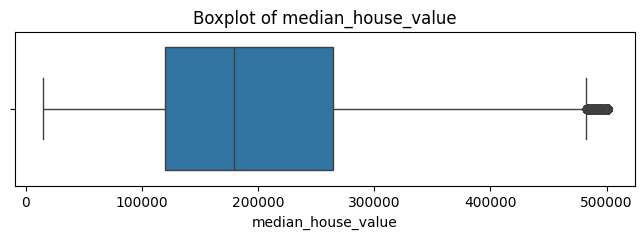

median_house_value has 1071 outliers



In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('housing.csv')

# Select numerical columns
num_cols = df.select_dtypes(include='number').columns

for col in num_cols:
    # Plot Histogram
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col],bins=30,kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

    # Plot Boxplot
    plt.figure(figsize=(8, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

    # Calculate outliers using IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col} has {len(outliers)} outliers\n")


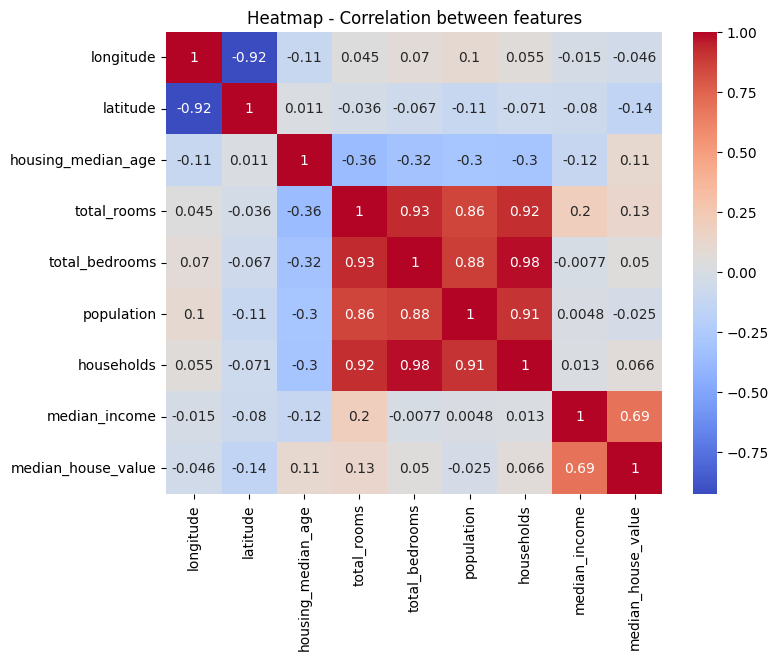

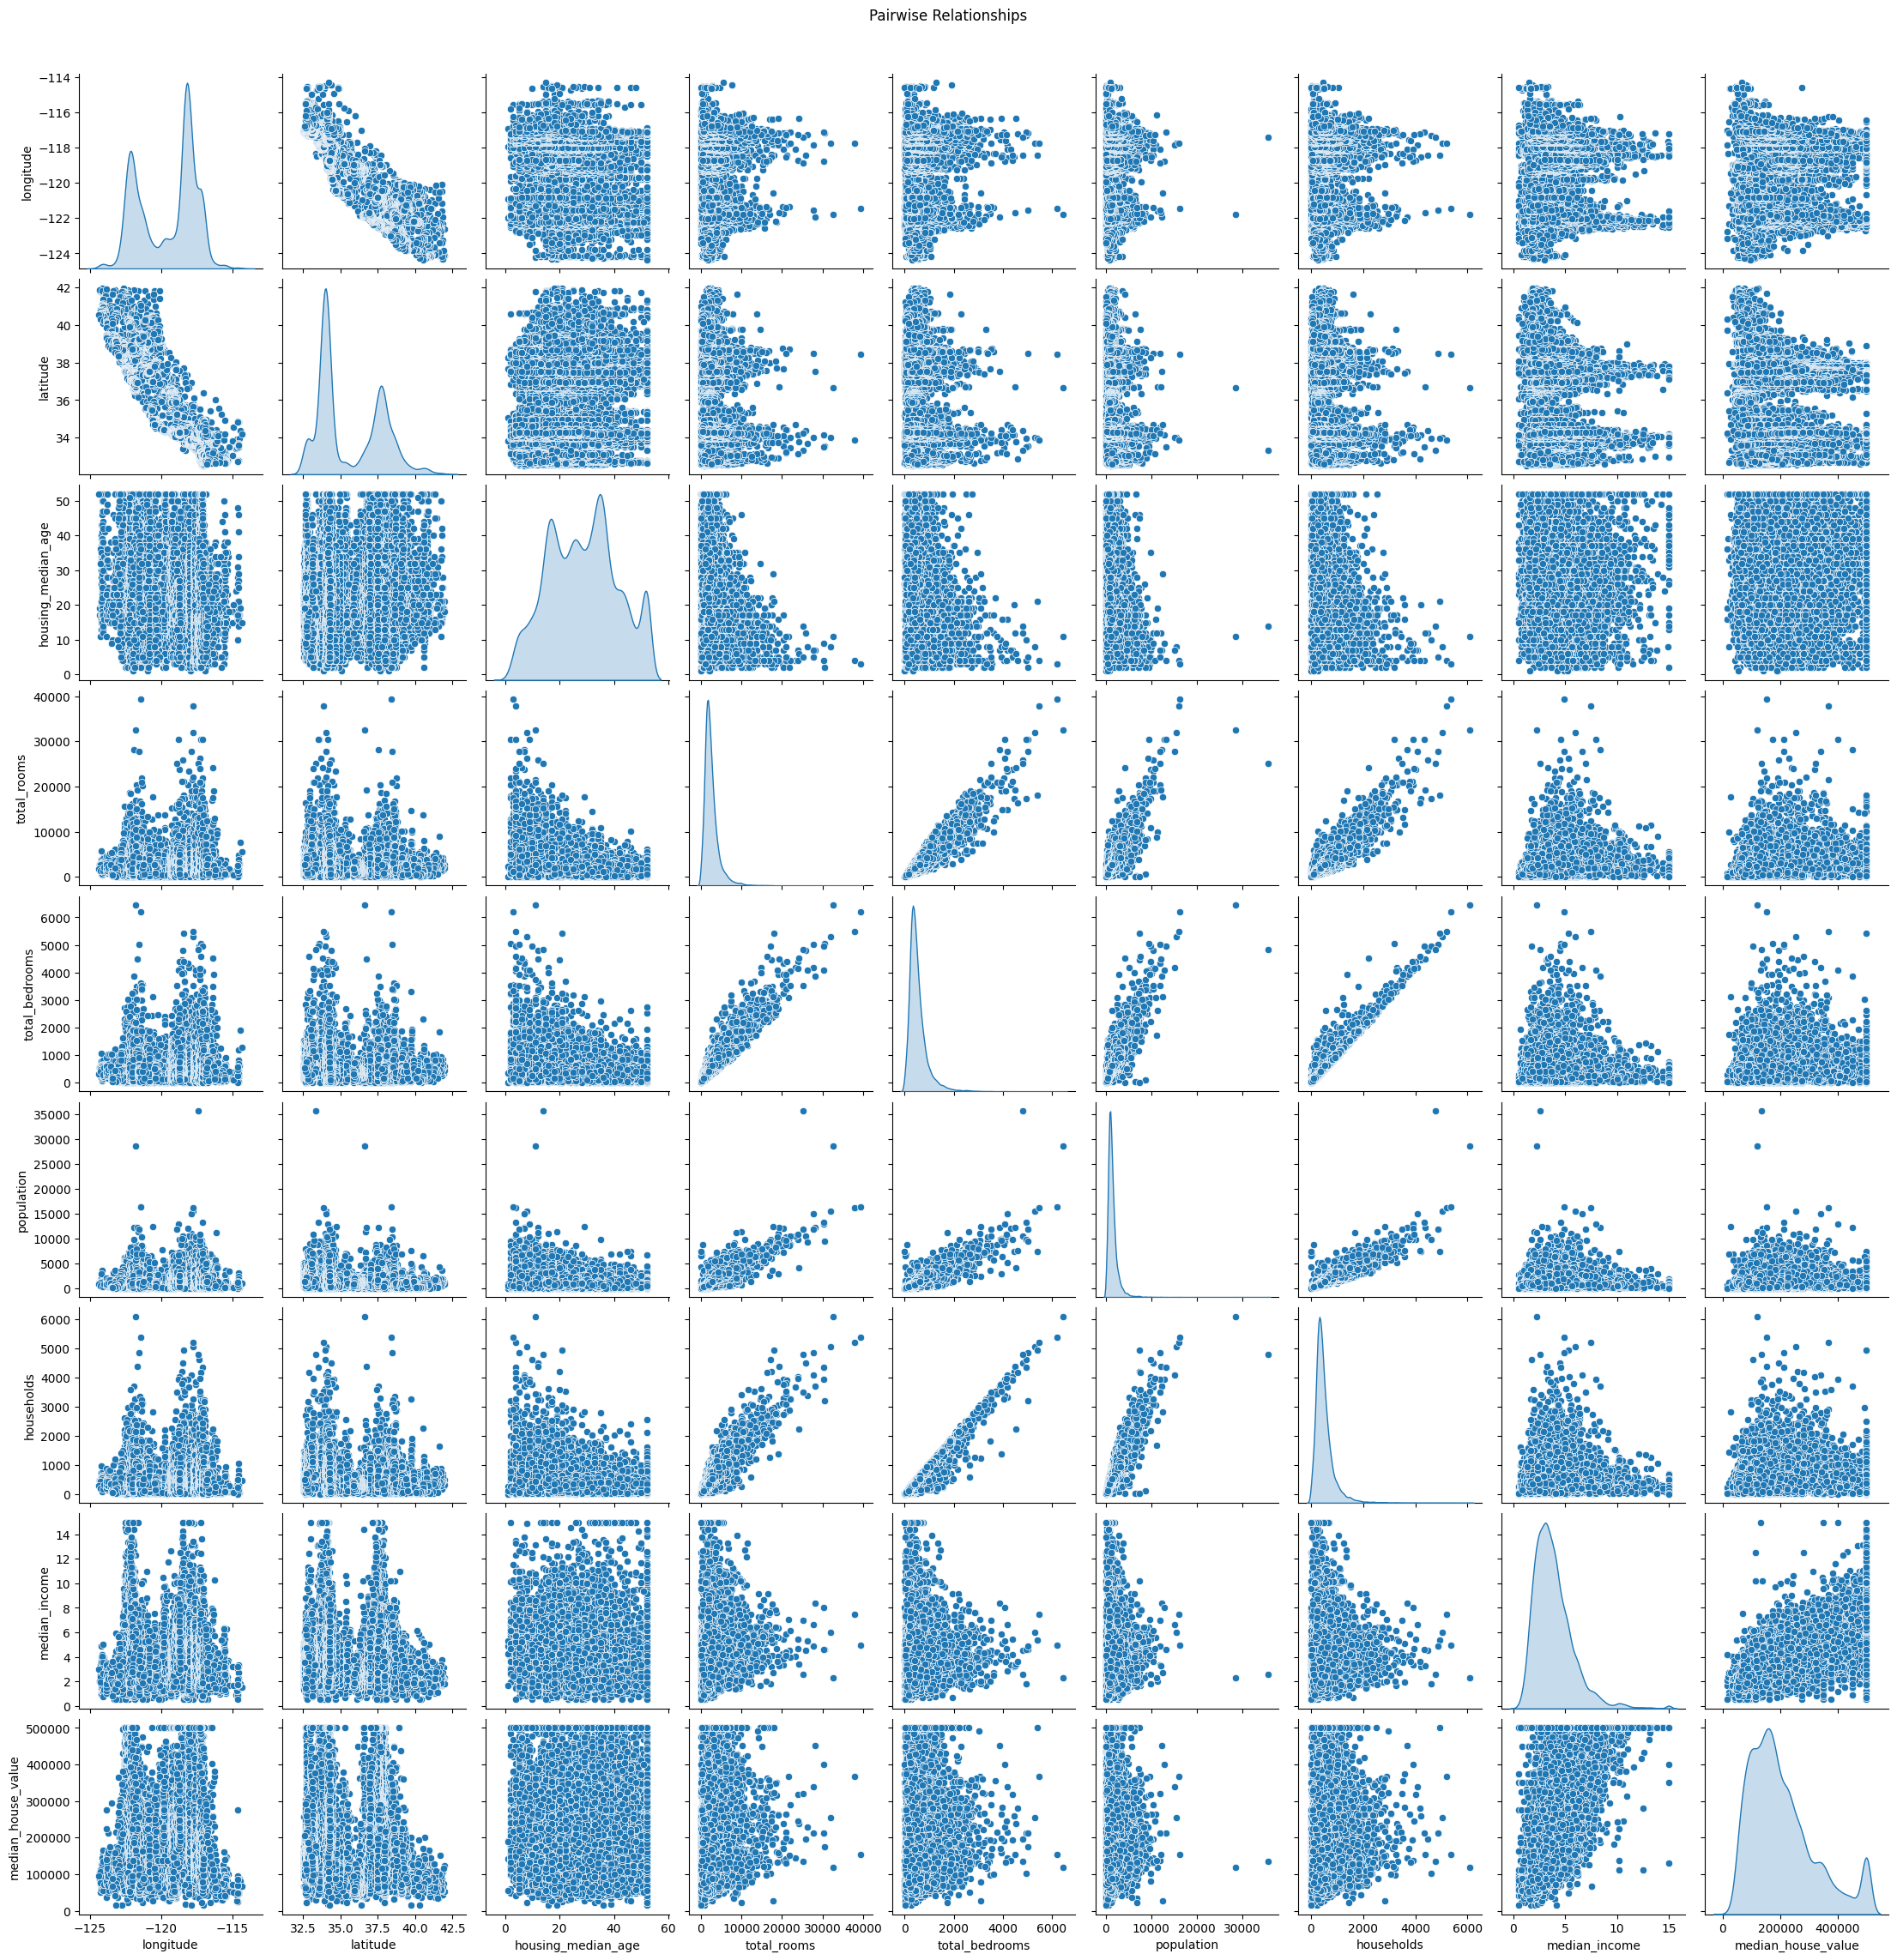

In [76]:
#LAB 2
#Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("housing.csv")
# 1. Correlation Matrix
corr = df.corr(numeric_only=True)  # Only numeric columns

# Print correlation matrix
# print("Correlation Matrix:")
# print(corr)

# 2. Heatmap of Correlation
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Heatmap - Correlation between features")
plt.show()

# 3. Pairplot for selected columns

sns.pairplot(df,diag_kind='kde')
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()


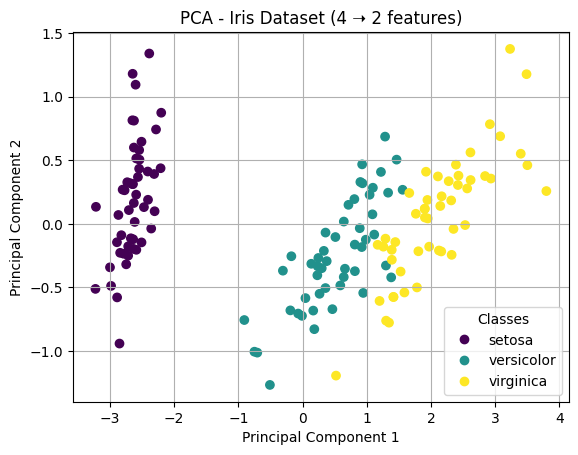

In [130]:
#LAB 3
# Step 1: Import required libraries
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Step 2: Load the Iris dataset
iris = load_iris()
data = iris.data           # Features (4 columns)
target = iris.target         # Labels (0, 1, 2 for flower types)
target_names=iris.target_names

# Step 3: Apply PCA to reduce from 4D to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data)

# Step 4: Plot the reduced 2D data
scatter=plt.scatter(X_pca[:, 0], X_pca[:, 1], c=target)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA - Iris Dataset (4 ➝ 2 features)")

# Step 5: Add legend
handles,labels = scatter.legend_elements()
plt.legend(handles,target_names, title="Classes")
plt.grid()
plt.show()


In [98]:
#LAB 4
import pandas as pd
data= pd.read_csv('data.csv')
attributes= data.iloc[:,:-1].values
target= data.iloc[:,-1].values
h=[]
k=0
for i in range(len(target)):
    if target[i]=="Yes":
        k=i
        h=attributes[i].copy()
        break
for i in range(k+1,len(target)):
    if target[i]=="Yes":
        for j in range(len(h)):
            if h[j]!=attributes[i][j]:
                h[j]='?'
print(h)

['>=9' 'Yes' '?' 'Good' '?' '?']


In [131]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

values = np.random.rand(100)  # Set seed for reproducibility
labels = []

for i in values[:50]:
    if i <= 0.5:
        labels.append("Class1")
    else:
        labels.append("Class2")

labels += [None] * 50

data = {"Point": [f"x{i+1}" for i in range(100)], "Value": values, "Label": labels}
df = pd.DataFrame(data)

labelled_df = df[df["Label"].notna()]
unlabeled_df = df[df["Label"].isna()]

X_train = labelled_df[["Value"]]
y_train = labelled_df["Label"]

X_test = unlabeled_df[["Value"]]

k_values = [1, 2, 3, 4, 5, 20, 30]

results = {}
accuracies = {}

true_labels = ["Class1" if x <= 0.5 else "Class2" for x in values[50:]]

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    results[k] = predictions
    accuracy =accuracy_score(true_labels, predictions) * 100
    accuracies[k] = accuracy
    print(f"Accuracy for k={k}: {accuracy:.2f}%")
    

Accuracy for k=1: 100.00%
Accuracy for k=2: 100.00%
Accuracy for k=3: 98.00%
Accuracy for k=4: 98.00%
Accuracy for k=5: 98.00%
Accuracy for k=20: 94.00%
Accuracy for k=30: 92.00%


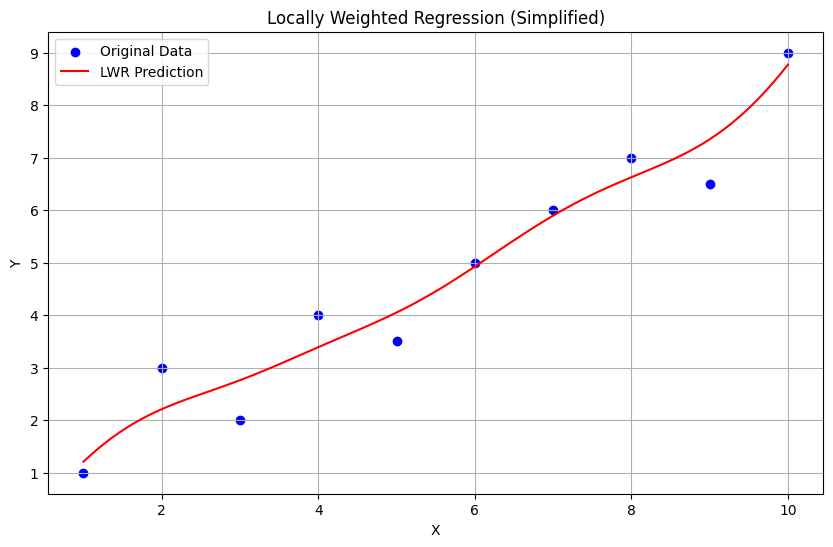

In [ ]:
#LAB 6
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Gaussian kernel gives more weight to nearby points
def kernel(x, x_point, tau):
    return np.exp(-((x - x_point) ** 2) / (2 * tau ** 2))

# Step 2: Locally Weighted Regression function
def lwr(X, y, x_point, tau):
    X_bias = np.c_[np.ones(len(X)), X]         # Add bias term (1s)
    x_point_bias = np.array([1, x_point])      # Query point with bias

    weights = np.diag(kernel(X, x_point, tau)) # Create weight matrix
    theta = np.linalg.inv(X_bias.T @ weights @ X_bias) @ X_bias.T @ weights @ y

    return x_point_bias @ theta                # Predict y at x_point

# Step 3: Sample data
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([1, 3, 2, 4, 3.5, 5, 6, 7, 6.5, 9])

# Step 4: Predict y for many x values using LWR
X_query = np.linspace(1, 10, 100)
tau = 1.0   # Bandwidth (smoothness control)

y_pred = np.array([lwr(X, y, xq, tau) for xq in X_query])

# Step 5: Plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Original Data')
plt.plot(X_query, y_pred, color='red', label='LWR Prediction')
plt.title("Locally Weighted Regression (Simplified)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid()
plt.show()


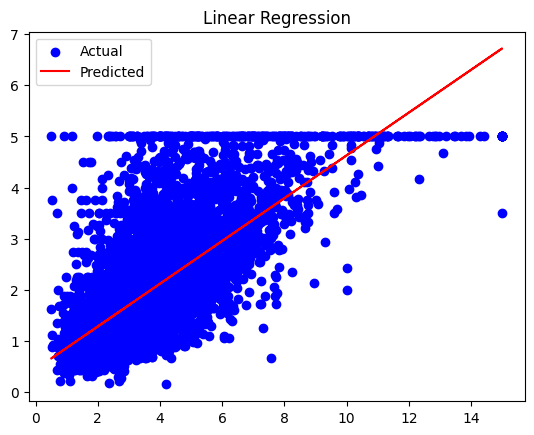

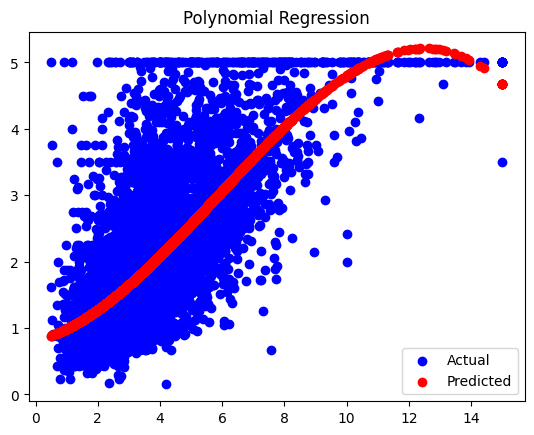

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

dataset = fetch_california_housing(as_frame=True)
df = pd.DataFrame(dataset.data)
x = df[["MedInc"]]
y = dataset.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
poly.fit(X_train, y_train)
y_pred_poly = poly.predict(X_test)

plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.title("Linear Regression")
plt.legend()
plt.show()

plt.scatter(X_test, y_test, color='blue', label="Actual")
plt.scatter(X_test, y_pred_poly, color='red', label="Predicted")
plt.title("Polynomial Regression")
plt.legend()
plt.show()

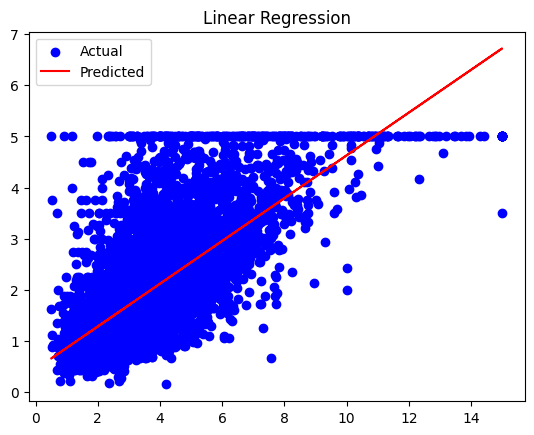

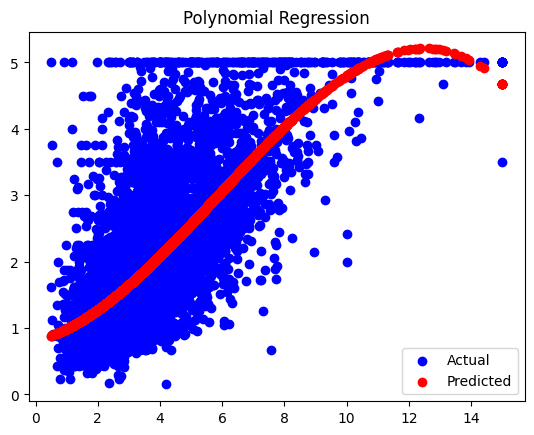

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

dataset = fetch_california_housing(as_frame=True)
df = pd.DataFrame(dataset.data)

x = df[["MedInc"]]
y = dataset.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42) 

from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
poly.fit(X_train, y_train)
y_pred_poly = poly.predict(X_test)

plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test["MedInc"], y_pred, color='red', label='Predicted')
plt.title("Linear Regression")
plt.legend()
plt.show()

plt.scatter(X_test, y_test, color='blue', label="Actual")
plt.scatter(X_test, y_pred_poly, color='red', label="Predicted")
plt.title("Polynomial Regression")
plt.legend()
plt.show()

Model accuracy :94.39%
predicted class for the new sample is Benign


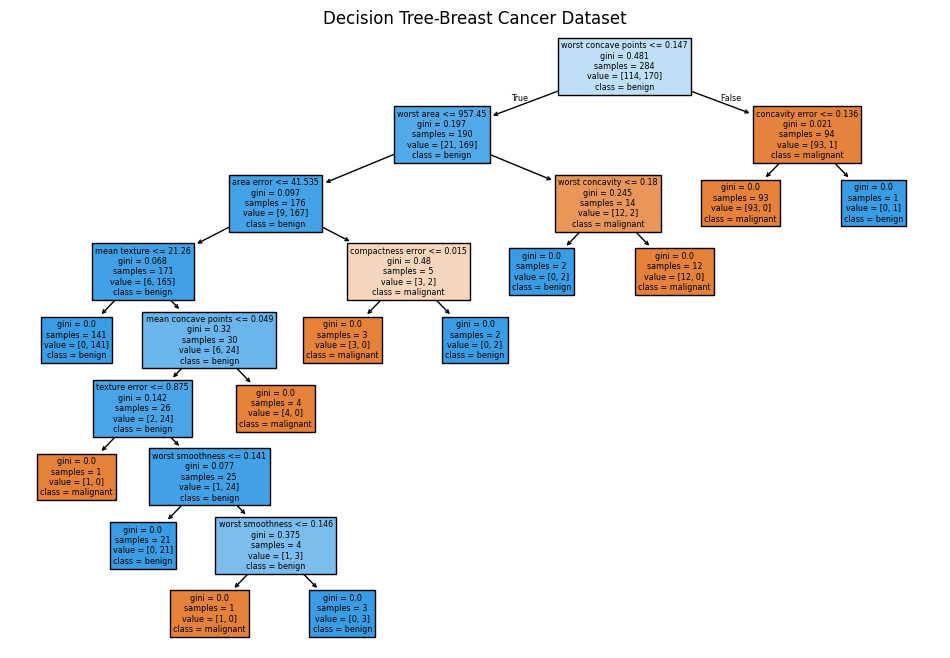

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

data = load_breast_cancer()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42
                                                    )
elf = DecisionTreeClassifier(random_state=42)
elf.fit(X_train, y_train)
y_pred = elf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy :{accuracy*100:.2f}%")

# Predicting a new sample
new_sample = np.array([X_test[0]])
prediction = elf.predict(new_sample)
prediction_class = "Benign" if prediction == 1 else "Malignant"
print(f"predicted class for the new sample is {prediction_class}")

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(elf, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.title("Decision Tree-Breast Cancer Dataset")
plt.show()

Accuracy of Naive Bayes Classifier on Olivetti faces dataset: 83.75%


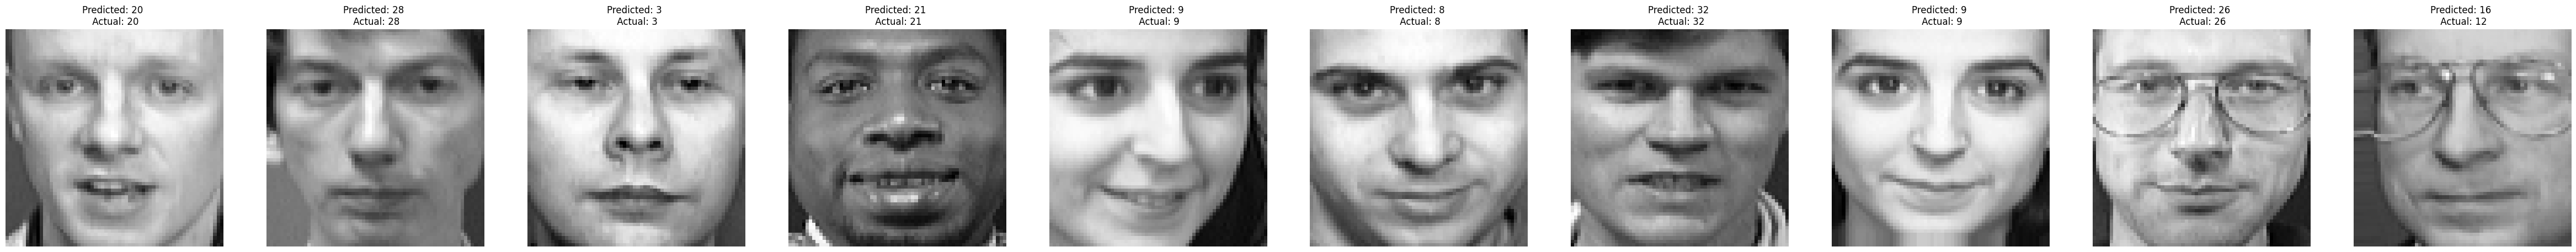

In [8]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()
import matplotlib.pyplot as plt

x = faces.data
y = faces.target

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

# Code from the second image
print(f"Accuracy of Naive Bayes Classifier on Olivetti faces dataset: {accuracy*100:.2f}%")

# code to display faces
n_samples=10
plt.figure(figsize=(60,10))

for i in range(n_samples):
    plt.subplot(1, n_samples, i + 1)  # Move to the next subplot
    plt.imshow(x_test[i].reshape(64, 64), cmap="gray")
    plt.title(f"Predicted: {y_pred[i]} \n Actual: {y_test[i]}")
    plt.axis('off')

plt.show()  # Show all images at once

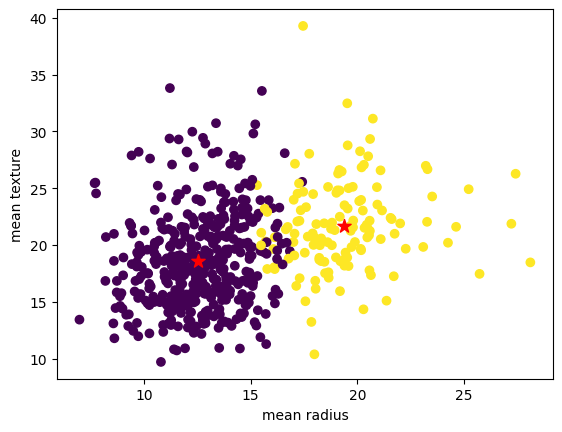

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_breast_cancer
import warnings

warnings.filterwarnings("ignore")

# Load the breast cancer dataset instead of CSV
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target

# Use all features except target for clustering
x = df.iloc[:, 0:-1]

# Fix the variable naming - use one consistent name
kmeans = KMeans(n_clusters=2)

kmeans.fit(x)
pred = kmeans.predict(x)

# print(x.iloc[:, 0])
# print(x.iloc[:, 1])

plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=pred, cmap="viridis", marker="o")
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=100,
    c="red",
    marker="*",
)

plt.xlabel("mean radius")
plt.ylabel("mean texture")
plt.show()

Silhouette Score: 0.34
Approx Accuracy (best match): 91.21%


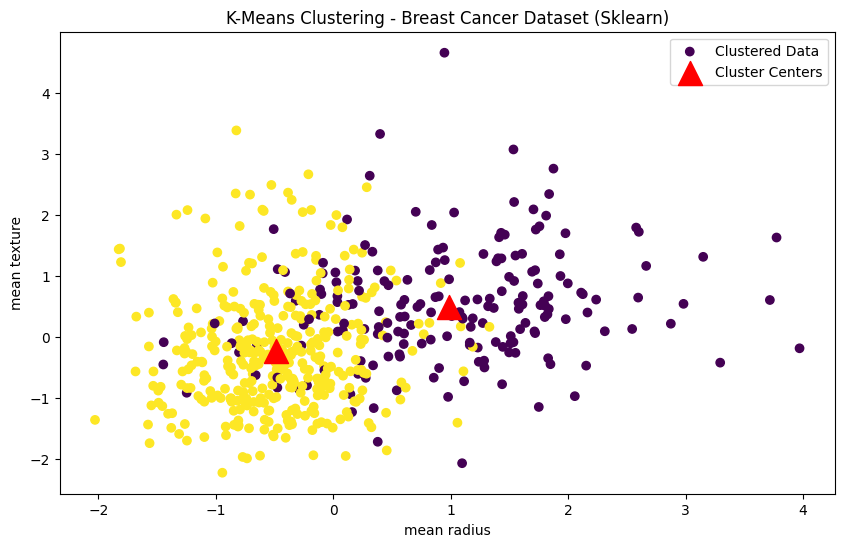

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings

warnings.filterwarnings("ignore")

# Load built-in dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
labels = data.target  # 0 = malignant, 1 = benign

# Standardize the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df)

# Apply KMeans clustering (2 clusters)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(x_scaled)
pred = kmeans.predict(x_scaled)

# Evaluate clustering
score = silhouette_score(x_scaled, pred)
print(f"Silhouette Score: {score:.2f}")

# Optional: Compare with true labels (not usually done in unsupervised learning)
from sklearn.metrics import accuracy_score
# NOTE: Cluster labels are arbitrary (0 or 1), so we might need to flip them
acc1 = accuracy_score(labels, pred)
acc2 = accuracy_score(labels, 1 - pred)
print(f"Approx Accuracy (best match): {max(acc1, acc2)*100:.2f}%")

# Visualization using first two features
plt.figure(figsize=(10, 6))
plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=pred, cmap='viridis', label='Clustered Data')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='red', marker='^', label='Cluster Centers')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.title("K-Means Clustering - Breast Cancer Dataset (Sklearn)")
plt.legend()
plt.show()


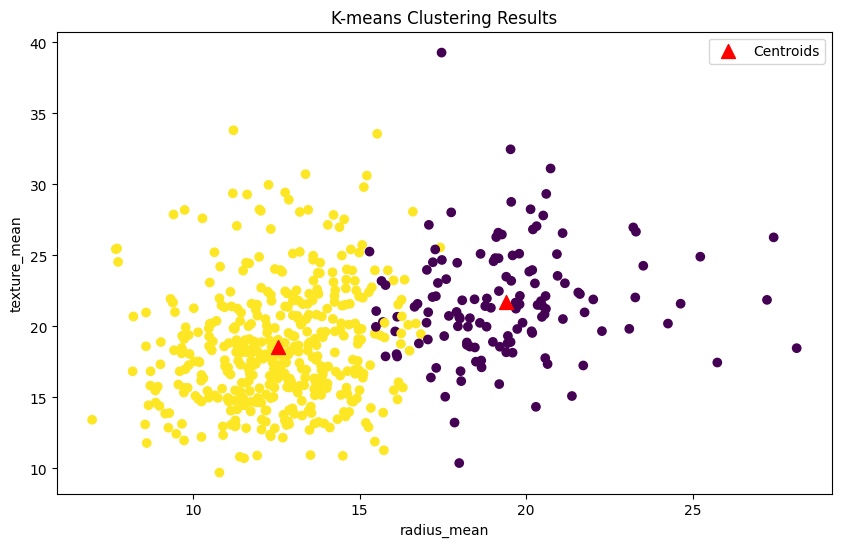

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings

warnings.filterwarnings('ignore')

# Read and prepare data
data = pd.read_csv("data10.csv")
df = data.drop(['id'], axis=1)  # Only drop 'id' column

# Select features for clustering
X = df.iloc[:, 1:]  # except first column

# Apply K-means clustering
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)

# Get predictions
pred = kmeans.predict(X)

# Visualize results
plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=pred, marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],s=100, c='red', marker='^', label='Centroids')

plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
plt.title('K-means Clustering Results')
plt.legend()
plt.show()